# Feature Engineering and Prediction

In [3]:
import numpy as np
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [4]:
#To check sentiments of Users
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
reviews = pd.read_csv('C:\\Users\\Admin34\\Desktop\\4k.2C.csv')

In [6]:
reviews.head(5)

,Review,Rating
0,The rooms are dirty the curtains were filthy. ...,1
1,I have to say I was nervous after reading some...,3
2,My son had to take my husband's place on the h...,3
3,"This was the 3rd time visiting New York, wante...",5
4,I am an essential worker I work at Sloan-Kette...,5


In [7]:
from nltk.corpus import stopwords

In [8]:
reviews['Review'][0]

"The rooms are dirty the curtains were filthy. Totally over priced and tourists tax is a rip off Also NYC is covered in scaffolding which is totally depressing. It didn't help that trump was in town so all roads were grid locked. It was also very expensive 9 dollars for a tuna roll. 84 dollars for breakfast. I love NYC but the city is ruined by scaffolding"

In [9]:
import nltk
nltk.downloader.download('vader_lexicon') #Require for working with sentiments Library

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin34\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Analysing data on sentiments library

In [10]:
sid = SentimentIntensityAnalyzer()

In [11]:
# Checking sentiments before stopwards removal
before_stopwords_removal=sid.polarity_scores(reviews['Review'][0])
before_stopwords_removal

{'neg': 0.138, 'neu': 0.825, 'pos': 0.037, 'compound': -0.7249}

In [12]:
remove_stopwords = ' '.join([word for word in reviews['Review'][0].split() if word.lower() not in stopwords.words('english')])

In [13]:
# Checking sentiments after stopwards removal
after_stopwords_removal=sid.polarity_scores(remove_stopwords)

In [14]:
after_stopwords_removal

{'neg': 0.197, 'neu': 0.643, 'pos': 0.159, 'compound': -0.1815}

In [15]:
def get_pos_sentiment(x):
    
    sent = sid.polarity_scores(x)
    return sent['pos']

def get_neg_sentiment(x):
    
    sent = sid.polarity_scores(x)
    return sent['neg']

def get_neu_sentiment(x):
    
    sent = sid.polarity_scores(x)
    return sent['neu']
    

In [16]:
#Better performance before removal of stopwords
reviews['Positive_Sentiment'] =   reviews.Review.apply(get_pos_sentiment)
reviews['Negative_Sentiment'] = reviews.Review.apply(get_neg_sentiment)
reviews['Neutral_Sentiment']  = reviews.Review.apply(get_neu_sentiment)

In [17]:
reviews.head()

,Review,Rating,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment
0,The rooms are dirty the curtains were filthy. ...,1,0.037,0.138,0.825
1,I have to say I was nervous after reading some...,3,0.232,0.032,0.735
2,My son had to take my husband's place on the h...,3,0.056,0.045,0.899
3,"This was the 3rd time visiting New York, wante...",5,0.171,0.046,0.783
4,I am an essential worker I work at Sloan-Kette...,5,0.261,0.009,0.731


### Extracting some useful features.

In [18]:
def get_char_count(sir):
    return len(sir)

def get_word_count(sir):
    return len(sir.split(' '))

def get_average_word_length(sir):
    aux = 0
    for word in sir.split(' '):
        aux += len(word)
    return aux/len(sir.split(' '))

In [19]:
reviews['Char_Count'] =  reviews.Review.apply(get_char_count)
reviews['Word_Count'] =  reviews.Review.apply(get_word_count)
reviews['Average_Word_Length'] =  reviews.Review.apply(get_average_word_length)

In [20]:
from nltk.corpus import stopwords


In [21]:
reviews.head()

,Review,Rating,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Char_Count,Word_Count,Average_Word_Length
0,The rooms are dirty the curtains were filthy. ...,1,0.037,0.138,0.825,357,67,4.343284
1,I have to say I was nervous after reading some...,3,0.232,0.032,0.735,783,147,4.333333
2,My son had to take my husband's place on the h...,3,0.056,0.045,0.899,453,80,4.675000
3,"This was the 3rd time visiting New York, wante...",5,0.171,0.046,0.783,506,99,4.121212
4,I am an essential worker I work at Sloan-Kette...,5,0.261,0.009,0.731,784,147,4.340136


#### Processing text to remove stopwords

In [22]:
def text_process(mess):
    
    return ' '.join([word for word in mess.split() if word.lower() not in stopwords.words('english')])

In [23]:
reviews['Review'].apply(text_process)

0       rooms dirty curtains filthy. Totally priced to...
1       say nervous reading reviews regarding hotel mi...
2       son take husband's place holiday. immediately ...
3       3rd time visiting New York, wanted older grand...
4       essential worker work Sloan-Kettering mskcc ho...
                              ...                        
4017    stayed Roosevelt seven nights. two sons shared...
4018    stayed Roosevelt Hotel expecting amazing time....
4019    little worried prior staying Xmas/New Years pe...
4020    second time stayed Roosevelt, good experience ...
4021    hotel fabulous location selected location lobb...
Name: Review, Length: 4022, dtype: object

In [24]:
# Word Cloud formation to see most occured words
from wordcloud import WordCloud,STOPWORDS
stop_words = list(STOPWORDS)

In [25]:
stopwords = list(STOPWORDS)

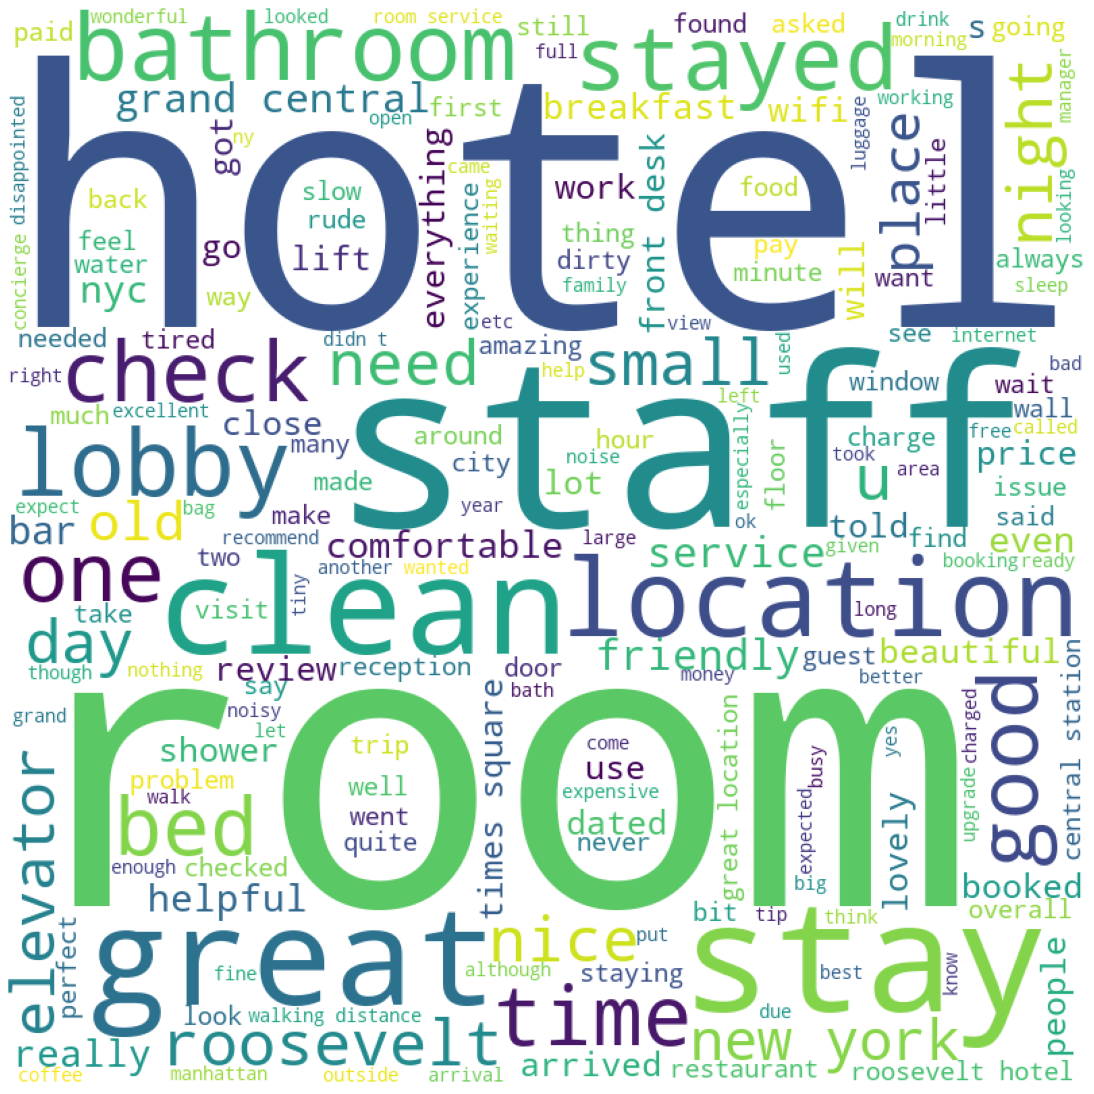

In [26]:
word_list = ''
for word in reviews['Review']:
    splited = word.lower()
    word_list +=splited
    
wordcloud = WordCloud(width=800,height=800,background_color='white',stopwords=stop_words,min_font_size=5).generate(word_list)
plt.figure(figsize = (25, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Exploring data after processing.

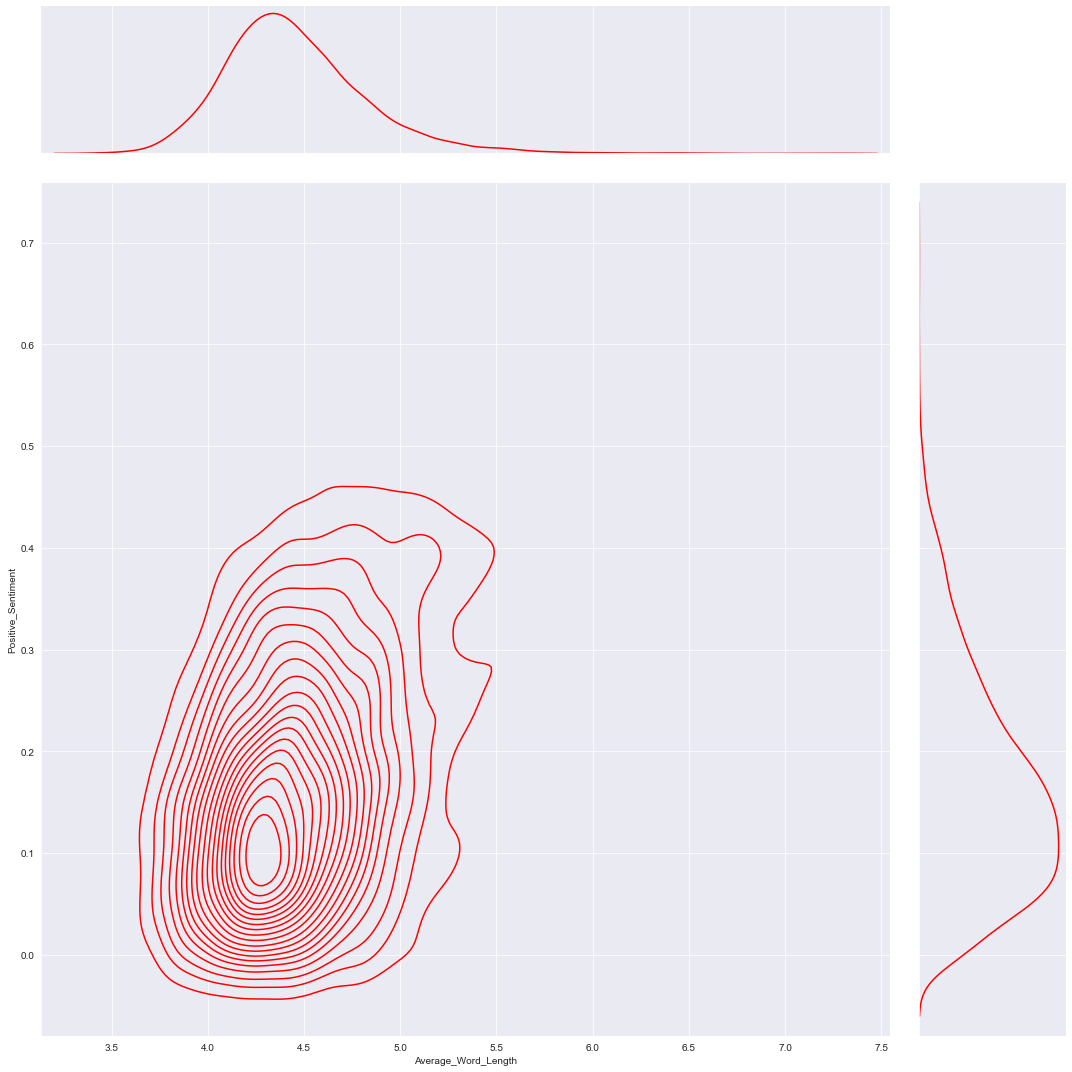

In [30]:
sns.jointplot(x=reviews['Average_Word_Length'],y=reviews['Positive_Sentiment'],height=15,kind='kde',levels=20,color='Red')

## It's important to check for outliers
##### Skewness and kurtosis for checking

In [31]:
data_info = reviews.describe()
data_info.loc['skew'] = reviews.skew()
data_info.loc['kurt'] = reviews.kurt()
data_info

,Rating,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Char_Count,Word_Count,Average_Word_Length
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000
mean,3.102934,0.164549,0.062722,0.772724,522.983093,97.395326,4.450664
std,1.350655,0.106056,0.058248,0.091408,224.418935,43.570053,0.367476
min,1.000000,0.000000,0.000000,0.321000,6.000000,1.000000,3.409836
25%,2.000000,0.083000,0.016000,0.716000,300.250000,54.250000,4.205388
50%,3.000000,0.148000,0.052000,0.783000,509.500000,94.000000,4.403105
75%,4.000000,0.229000,0.093000,0.839000,780.000000,143.000000,4.640841
max,5.000000,0.679000,0.364000,1.000000,1752.000000,330.000000,7.269231
skew,-0.167386,0.728091,1.206959,-0.526806,0.007076,0.042140,1.051412
kurt,-1.148764,0.140279,1.795821,0.226767,-1.390654,-1.363209,2.943378


C:\Users\Admin34\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Word_Count', ylabel='Density'>

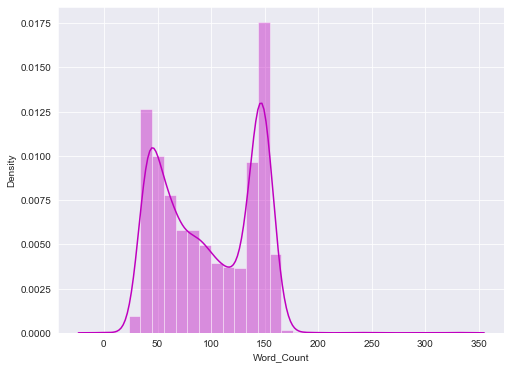

In [32]:
#Word count has highest kurtosis
plt.figure(figsize=(8,6))
sns.distplot(reviews['Word_Count'],color='m')

#### Checking for outlier and removing it.

C:\Users\Admin34\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Word_Count', ylabel='Density'>

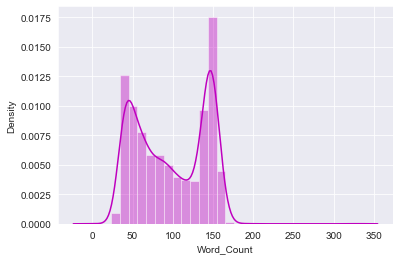

In [33]:
sns.distplot(reviews[reviews['Word_Count']<1000]['Word_Count'],color='m')

<AxesSubplot:xlabel='Rating', ylabel='Word_Count'>

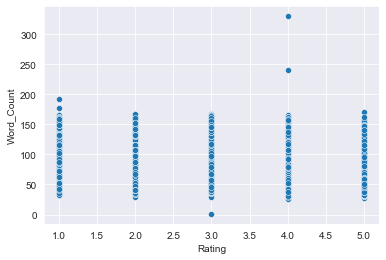

In [34]:
sns.scatterplot(y=reviews['Word_Count'],x=reviews['Rating'])

In [35]:
reviews = reviews[reviews['Word_Count']<1250]

C:\Users\Admin34\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Word_Count', ylabel='Density'>

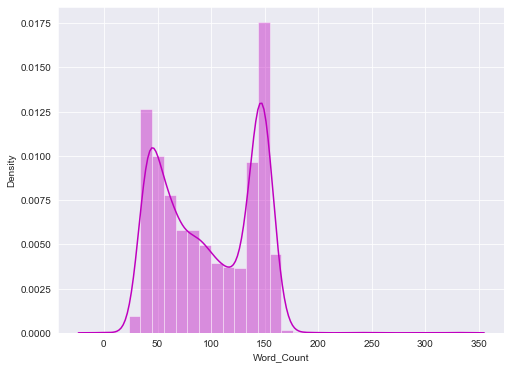

In [36]:
plt.figure(figsize=(8,6))
sns.distplot(reviews['Word_Count'],color='m')

In [37]:
data_info.loc['skew'] = reviews.skew()
data_info.loc['kurt'] = reviews.kurt()
data_info

,Rating,Positive_Sentiment,Negative_Sentiment,Neutral_Sentiment,Char_Count,Word_Count,Average_Word_Length
count,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000
mean,3.102934,0.164549,0.062722,0.772724,522.983093,97.395326,4.450664
std,1.350655,0.106056,0.058248,0.091408,224.418935,43.570053,0.367476
min,1.000000,0.000000,0.000000,0.321000,6.000000,1.000000,3.409836
25%,2.000000,0.083000,0.016000,0.716000,300.250000,54.250000,4.205388
50%,3.000000,0.148000,0.052000,0.783000,509.500000,94.000000,4.403105
75%,4.000000,0.229000,0.093000,0.839000,780.000000,143.000000,4.640841
max,5.000000,0.679000,0.364000,1.000000,1752.000000,330.000000,7.269231
skew,-0.167386,0.728091,1.206959,-0.526806,0.007076,0.042140,1.051412
kurt,-1.148764,0.140279,1.795821,0.226767,-1.390654,-1.363209,2.943378


<AxesSubplot:xlabel='Rating', ylabel='Word_Count'>

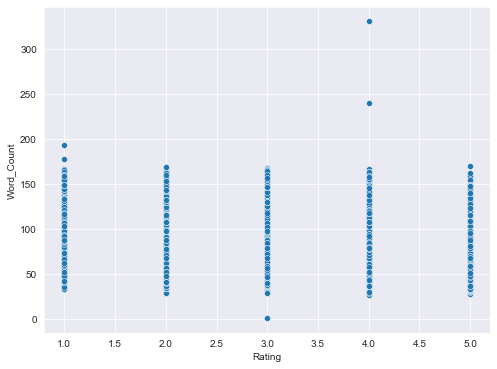

In [38]:
plt.figure(figsize=(8,6))

sns.scatterplot(y=reviews['Word_Count'],x=reviews['Rating'], palette='PuBu')

## Models used Linear Regression and Random Classifier

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,confusion_matrix,classification_report,accuracy_score

In [41]:
X=reviews[['Positive_Sentiment','Negative_Sentiment','Word_Count','Average_Word_Length']]
y=reviews['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
lr = LinearRegression()

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
pred = lr.predict(X_test)

In [45]:
print(classification_report(y_test,np.round(pred)))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.64      0.12      0.21       203
         2.0       0.30      0.43      0.35       192
         3.0       0.37      0.63      0.47       287
         4.0       0.41      0.44      0.43       292
         5.0       0.55      0.22      0.31       233
         6.0       0.00      0.00      0.00         0

    accuracy                           0.39      1207
   macro avg       0.32      0.26      0.25      1207
weighted avg       0.45      0.39      0.37      1207



C:\Users\Admin34\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [46]:
rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
pred=rfc.predict(X_test)

In [49]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

In [50]:
explained_variance_score(y_test,pred)

0.22582703983637153

In [51]:
mean_squared_error(y_test,pred)

1.4208782104391051

In [52]:
mean_absolute_error(y_test,pred)

0.8657829328914665

In [ ]:
#Accuracy is pretty good though it can be increased with the better  feature engineering .#